In [1]:
# %load red_Cell.py
from openpiv import tools, pyprocess, scaling, filters, \
                    validation

import numpy as np
import matplotlib.pyplot as plt

import imageio
from pylab import *
%matplotlib inline

from skimage import img_as_uint

In [2]:
frame_a  = tools.imread('../test3/Y4-S3_Camera000398.tif')  
frame_b  = tools.imread('../test3/Y4-S3_Camera000399.tif')

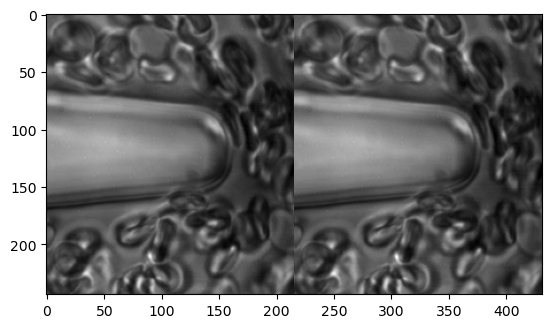

In [3]:
plt.imshow(np.c_[frame_a[40:,:-40],frame_b[40:,:-40]],cmap=plt.cm.gray)

In [4]:
frame_a = frame_a[40:, :-40].astype(np.int32) # change of type for the Cython WiDIM
frame_b = frame_b[40:, :-40].astype(np.int32)

In [5]:
# Use Python version, pyprocess:

u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a, frame_b, 
                                                     window_size=32, 
                                                     overlap=16,
                                                     search_area_size=32,
                                                     dt=.1, 
                                                     sig2noise_method='peak2peak',
                                                    normalized_correlation=True,
                                                    correlation_method = 'circular')
x, y = pyprocess.get_coordinates(image_size=frame_a.shape, 
                                 search_area_size=32, 
                                 overlap=16)

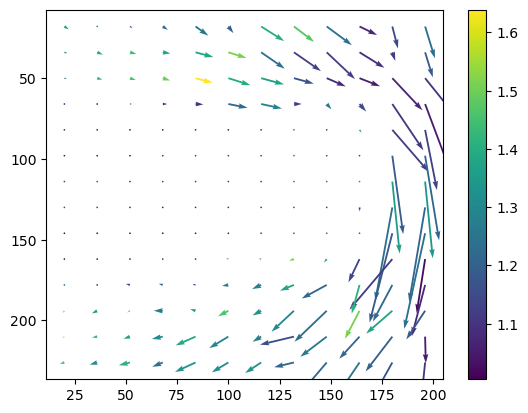

In [6]:
plt.quiver(x,y,u,-v,sig2noise)
plt.gca().invert_yaxis()
plt.colorbar()

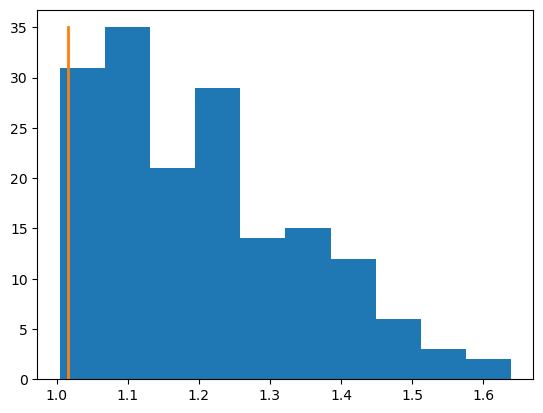

In [7]:
plt.hist(sig2noise.flatten());
p = percentile(sig2noise,5) # bottom 5%
plt.plot([p,p],[0,35],lw=2)

In [10]:
mask = validation.sig2noise_val( sig2noise, threshold = p )
u, v = filters.replace_outliers( u, v, mask, method='localmean', max_iter=1, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 1. )
x, y, u, v = tools.transform_coordinates(x, y, u, v)
tools.save(x, y, u, v, mask, 'Y4-S3_Camera000398_a.txt' )

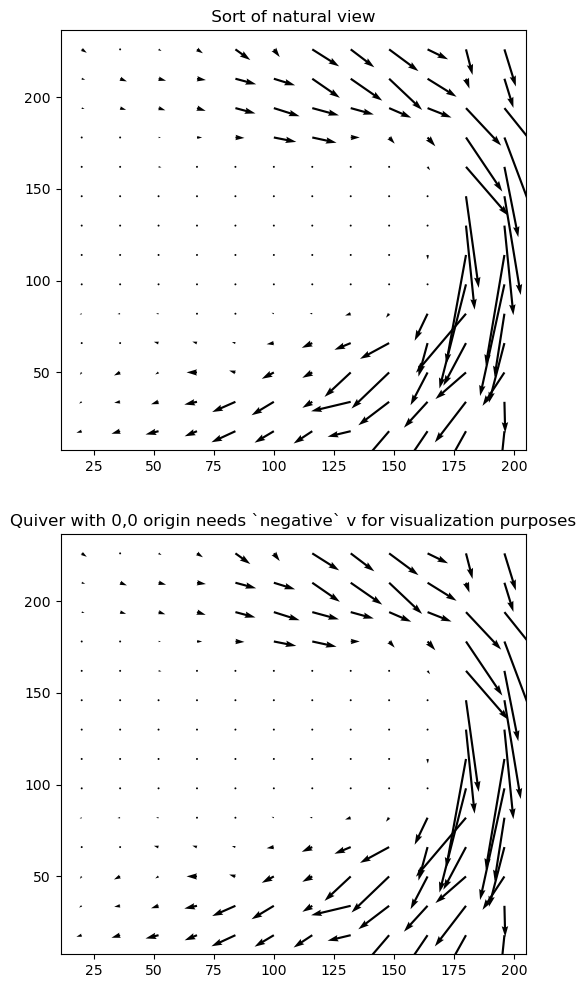

In [11]:
# "natural" view without image
fig,ax = plt.subplots(2,1,figsize=(6,12))
# ax[0].invert_yaxis()
ax[0].quiver(x,y,u,v)
ax[0].set_title(' Sort of natural view ')

ax[1].quiver(x,y,u,v)
ax[1].set_title('Quiver with 0,0 origin needs `negative` v for visualization purposes');
# plt.quiver(x,y,u,v)

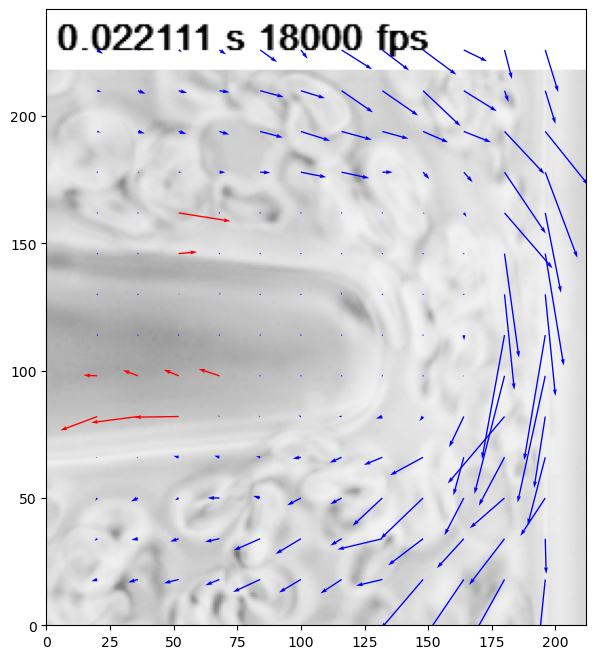

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [12]:
fig,ax = plt.subplots(figsize=(8,8))
tools.display_vector_field('Y4-S3_Camera000398_a.txt', 
                           on_img=True,
                           image_name='../test3/Y4-S3_Camera000398.tif',
                           scaling_factor=1.,
                          ax = ax)

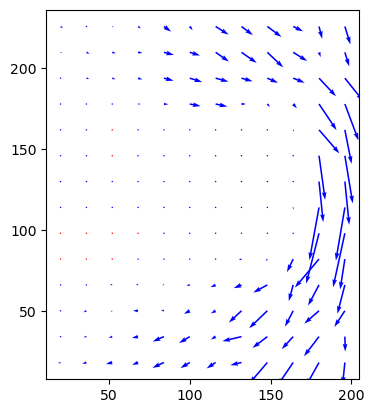

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [13]:
tools.display_vector_field('Y4-S3_Camera000398_a.txt', scale=300, 
                           width=0.005,scaling_factor=1.)